For the very first step, we load in respectively the BookCorpus dataset and the complete RustyQuill corpus to train the topic modelling model.

In [1]:
import os
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess_NVA(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract nouns, verbs, and adjectives
    filtered_words = [token.text for token in doc if token.pos_ in {'NOUN','ADJ','VERB'}]

    # Join the filtered words back into a single string
    processed_text = ' '.join(filtered_words)
    
    return processed_text

def preprocess_files_in_folder(folder_path):
    all_texts = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the text file
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
            
            # Preprocess the text
            processed_text = preprocess_NVA(text)
            all_texts.append(processed_text)
    
    return all_texts



# with open('D:/Projects/project1/books_large_p1.txt', 'r') as file:
#     bookcorpus_1 = file.read()
# with open('D:/Projects/project1/books_large_p2.txt', 'r') as file:
#     bookcorpus_2 = file.read()




Loading the BookCorpus Dataset

In [30]:
def read_txt_files(directory_path):
    file_contents = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r', encoding="utf-8") as file:
                file_contents.append(file.read())
    return file_contents

# Example usage
directory_path = "C:/Users/Patrick/Desktop/CLS/session-09-20240430T122340Z-001/session-09/hp_topic_model/books/books"
txt_files_content = read_txt_files(directory_path)

Fitting LDA to BookCorpus in chunks

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to fit LDA in chunks
def fit_lda_in_chunks(texts, chunk_size=1000, n_topics=100):
    vectorizer = CountVectorizer(max_df=0.5)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)

    for i in range(0, len(texts), chunk_size):
        chunk = texts[i:i + chunk_size]
        X_chunk = vectorizer.fit_transform(chunk)
        lda.partial_fit(X_chunk)
    
    return vectorizer, lda

# Example usage
texts = txt_files_content  # Your large list of text data
vectorizer, lda = fit_lda_in_chunks(texts, chunk_size=1000)

# Optional: Print the topics and their top words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10
print("Topics found by LDA:")
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)


Topics found by LDA:
Topic #0: wizard witch faerie magical crystal queen wizards witches guards thy
Topic #1: trevor rats rat asks ship sheriff sardines humans boone elevator
Topic #2: avait et la dans elle pas gris qui comme était
Topic #3: sarene dilaf wil kil sule uncle stil daimon ed gyorn
Topic #4: ship crew military ships planet captain officer pilot deck colonel
Topic #5: trial courtroom officer lawyer jury interview identity lawyers bond elevator
Topic #6: angel angels rake students belial hellhound az cemetery hound library
Topic #7: demon demons gods god sword spells goddess soldiers telepath statue
Topic #8: island rubi aye rope ship deck porch cliff ferry grandfather
Topic #9: sword dwarf king chamber village lass warrior arrow dwarfs guards
Topic #10: elemental demon succubus vampire vampires fae demons humans incubus vamp
Topic #11: cerise boat psychic captain sword treasure deck antonietta ship blueblood
Topic #12: earl parlor butler landen footman geist library lord car

Fitting NMF to BookCorpus

In [75]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer

# Assume count_vectorizer is your fitted CountVectorizer object
# and corpus is the list of documents (if you need it to refit)

# Step 1: Transform the corpus to document-term matrix
document_term_matrix = vectorizer.transform(txt_files_content)

# Step 2: Initialize and fit the NMF model
n_topics = 100
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(document_term_matrix)

# Now nmf_model is trained on your corpus with 100 topics


NMF(n_components=100, random_state=42)

Load in the Rusty Quill corpus

In [17]:
s1 = preprocess_files_in_folder('Seasons_txts/season1')
s2 = preprocess_files_in_folder('Seasons_txts/season2')
s3 = preprocess_files_in_folder('Seasons_txts/season3')
s4 = preprocess_files_in_folder('Seasons_txts/season4')
s5 = preprocess_files_in_folder('Seasons_txts/season5')
rusty_quill_others = preprocess_files_in_folder('rusty_quill')
rusty_quill_all = s1+s2+s3+s4+s5+rusty_quill_others

In [13]:
def vectorize_texts(texts):
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()

    # Fit and transform the texts to get the feature matrix
    X = vectorizer.fit_transform(texts)
    
    return X, vectorizer

In [124]:
X_rusty, vectorizer_rusty = vectorize_texts(rusty_quill_all)

Preprocessing pipeline with {Noun, Verb} and {Noun} approach

In [19]:
def preprocess_NV(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract nouns, verbs, and adjectives
    filtered_words = [token.text for token in doc if token.pos_ in {'NOUN','VERB'}]

    # Join the filtered words back into a single string
    processed_text = ' '.join(filtered_words)
    
    return processed_text

def preprocess_files_in_folder_NV(folder_path):
    all_texts = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the text file
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
            
            # Preprocess the text
            processed_text = preprocess_NV(text)
            all_texts.append(processed_text)
    
    return all_texts

def preprocess_N(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract nouns, verbs, and adjectives
    filtered_words = [token.text for token in doc if token.pos_ in {'NOUN'}]

    # Join the filtered words back into a single string
    processed_text = ' '.join(filtered_words)
    
    return processed_text

def preprocess_files_in_folder_N(folder_path):
    all_texts = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the text file
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
            
            # Preprocess the text
            processed_text = preprocess_N(text)
            all_texts.append(processed_text)
    
    return all_texts

Getting {Noun,Verb} and {Noun} texts

In [20]:
s1_N = preprocess_files_in_folder_N('Seasons_txts/season1')
s2_N = preprocess_files_in_folder_N('Seasons_txts/season2')
s3_N = preprocess_files_in_folder_N('Seasons_txts/season3')
s4_N = preprocess_files_in_folder_N('Seasons_txts/season4')
s5_N = preprocess_files_in_folder_N('Seasons_txts/season5')
s1_NV = preprocess_files_in_folder_NV('Seasons_txts/season1')
s2_NV = preprocess_files_in_folder_NV('Seasons_txts/season2')
s3_NV = preprocess_files_in_folder_NV('Seasons_txts/season3')
s4_NV = preprocess_files_in_folder_NV('Seasons_txts/season4') 
s5_NV = preprocess_files_in_folder_NV('Seasons_txts/season5')

Fitting LDA, NMF and LSI on Rusty Quill Corpus

In [22]:
no_topics_rusty = 25
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"{model} Topic {topic_idx +1 }:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

from sklearn.decomposition import NMF
nmf_ru = NMF(n_components=no_topics_rusty, random_state=42, max_iter=400)  # Adjust n_components as needed
nmf_ru.fit_transform(X_rusty)
feature_names = vectorizer_rusty.get_feature_names_out()
# Feature names
display_topics(nmf_ru, feature_names, no_topics_rusty)

from sklearn.decomposition import LatentDirichletAllocation
lda_ru = LatentDirichletAllocation(n_components=no_topics_rusty, random_state=42, max_iter=400)  # Adjust n_components as needed
lda_ru.fit_transform(X_rusty)
feature_names = vectorizer_rusty.get_feature_names_out()
display_topics(lda_ru, feature_names, no_topics_rusty)

from sklearn.decomposition import TruncatedSVD
svd_ru = TruncatedSVD(n_components=no_topics_rusty, random_state=42)
lsi_ru = svd_ru.fit_transform(X_rusty)
feature_names = vectorizer_rusty.get_feature_names_out()
for topic_idx, topic in enumerate(svd_ru.components_):
    print(f"Topic {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-no_topics_rusty - 1:-1]]))

NMF(max_iter=400, n_components=25, random_state=42) Topic 1:
seemed looked started felt statement turned asked tried began house night stood kept dark light sort given floor walked were decided police sat most seem
NMF(max_iter=400, n_components=25, random_state=42) Topic 2:
creature starts move wall water lighter fuck chute walk continues growls rock pain flute wait growling bag light climb run distance flicks walks grunts fucking
NMF(max_iter=400, n_components=25, random_state=42) Topic 3:
water river carpenter car silence faith feet voice house road back brother comes town fade great trawler growing radio close empty begins legs mason listen
NMF(max_iter=400, n_components=25, random_state=42) Topic 4:
yellow starts piano music fuck play larson bed walks snow window seems looks night light town large fucking side mine wait thunder bar clothes dark
NMF(max_iter=400, n_components=25, random_state=42) Topic 5:
ingra wind power bliss blood house voice sense thunder die is kill fine kitty

Creates list of all season texts with differen parsing schemes

In [65]:
seasons = [s1,s2,s3,s4,s5]
seasons_NV = [s1_NV,s2_NV,s3_NV,s4_NV,s5_NV]
seasons_N = [s1_N,s2_N,s3_N,s4_N,s5_N]

Sample Code to create plot for the seasonal trend of top 5 increasing and top 5 decreasing topics

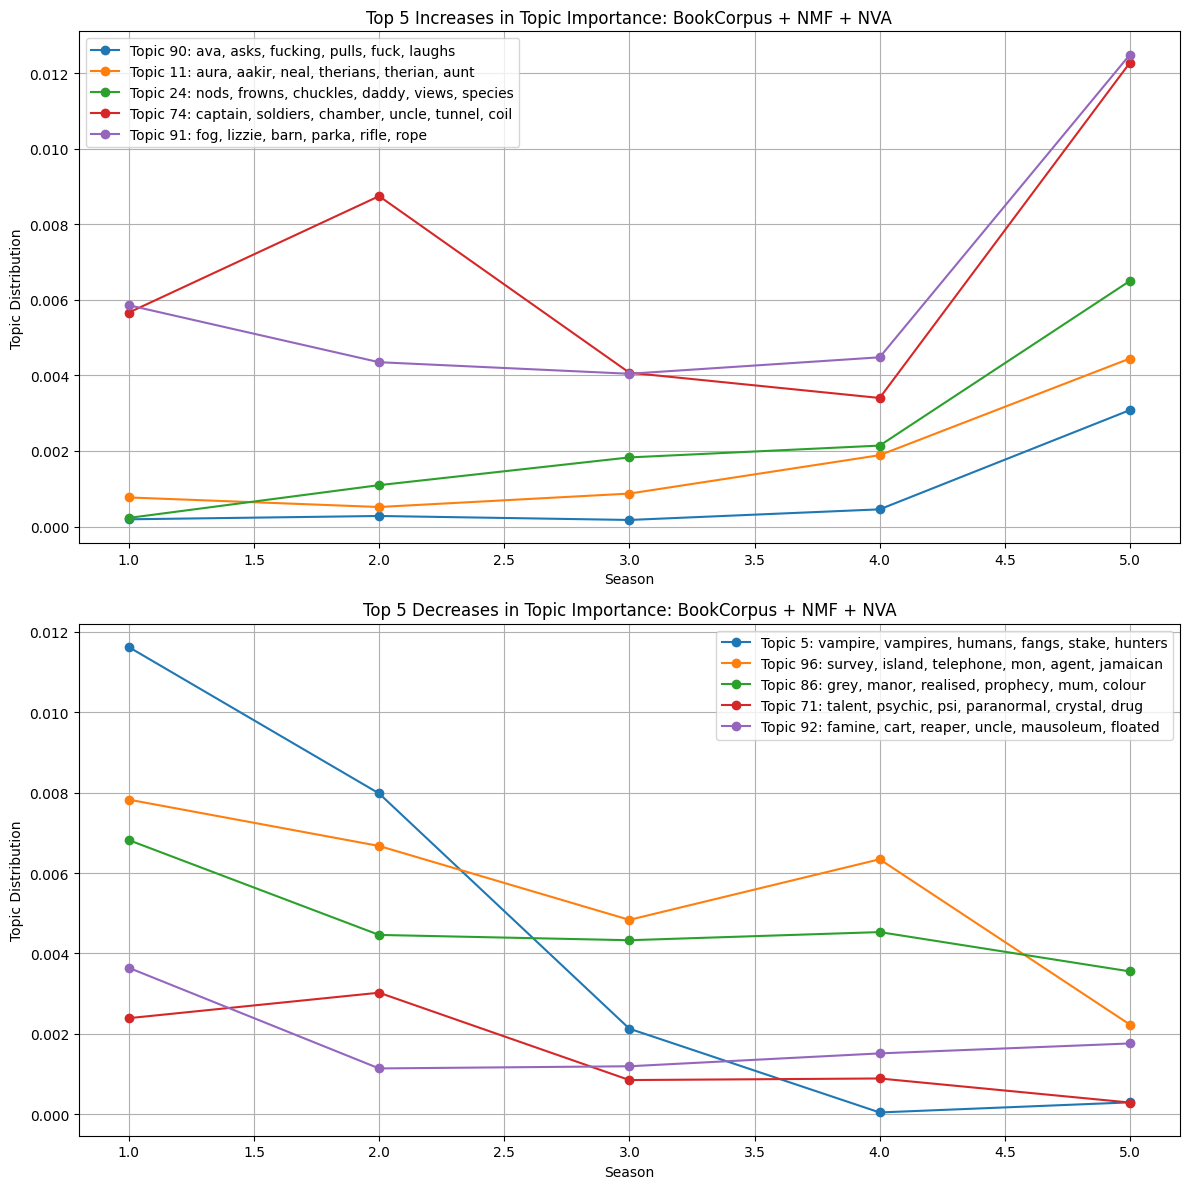

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Transform the new corpus
# Assuming new_corpus is a list of seasons, each containing a list of episode strings
season_topic_distributions = []
'''
Decide either 'seasons', 'seasons_NV' or 'seasons_N' for results of different parsing schemes

Decide either 'vectorizer_rusty' or 'vectorizer' depending on which pretraining corpus

Decide either nfm_model, nfm_ru, lda, lda_ru, or lsi depending on model & pretraining corpus

'''
for season in seasons:
    season_doc_term_matrix = vectorizer.transform(season)
    season_topic_matrix = nmf_model.transform(season_doc_term_matrix)
    season_topic_distributions.append(season_topic_matrix)

# Step 2: Aggregate the topic distributions over each season
season_topic_averages = np.array([season.mean(axis=0) for season in season_topic_distributions])

# Step 3: Calculate the change in topic importance from the first to the last season
topic_changes = season_topic_averages[-1] - season_topic_averages[0]

# Step 4: Identify the top five topics with the most increases and decreases in importance
top_5_increases = np.argsort(topic_changes)[-5:]
top_5_decreases = np.argsort(topic_changes)[:5]

# Get feature names (words) from the count vectorizer
feature_names = vectorizer.get_feature_names_out()

# Function to get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

# Get the top words for each topic
top_words_per_topic = get_top_words(nmf_model, feature_names, 6)

# Step 5: Plot the results using Matplotlib
plt.figure(figsize=(12, 12))

# Plot for the top 5 increases
plt.subplot(2, 1, 1)
for topic in top_5_increases:
    top_words = ", ".join(top_words_per_topic[topic])
    plt.plot(range(1, len(seasons) + 1), season_topic_averages[:, topic], label=f'Topic {topic}: {top_words}', marker="o")
plt.title('Top 5 Increases in Topic Importance: BookCorpus + NMF + NVA')
plt.xlabel('Season')
plt.ylabel('Topic Distribution')
plt.grid(True)
plt.legend()

# Plot for the top 5 decreases
plt.subplot(2, 1, 2)
for topic in top_5_decreases:
    top_words = ", ".join(top_words_per_topic[topic])
    plt.plot(range(1, len(seasons) + 1), season_topic_averages[:, topic], label=f'Topic {topic}: {top_words}', marker="o")
plt.title('Top 5 Decreases in Topic Importance: BookCorpus + NMF + NVA')
plt.xlabel('Season')
plt.ylabel('Topic Distribution')
plt.grid(True)
plt.legend(
    
)

plt.tight_layout()
plt.show()

Below is the supersense tagger sample code. The approach was scratched because supersense taggers relied on full sentences and their part of speech to return the most efficient results. Since topic modelling only return words, supersense tagging was sidestepped due to time constrait.

In [ ]:
import subprocess
import json
import os

def tag_word_supersense(word, booknlp_path, output_dir):
    # Create a temporary input file for the word
    input_file = os.path.join(output_dir, 'temp.txt')
    with open(input_file, 'w') as f:
        f.write(word)
    
    # Construct the BookNLP command
    command = f"java -Xmx10G -cp {booknlp_path}/target/scala-2.11/booknlp-assembly-1.0.jar " \
              f"edu.illinois.cs.cogcomp.pipeline.main.PipelineRunner -doc {input_file} " \
              f"-output {output_dir} -ss"
    
    # Run the command using subprocess
    subprocess.run(command, shell=True, check=True)
    
    # Read the JSON output
    output_file = os.path.join(output_dir, 'temp.supersenses.json')
    with open(output_file, 'r') as f:
        supersenses_data = json.load(f)
    
    # Extract supersense information for the word
    word_supersense = supersenses_data.get('supersenses', {}).get(word, {})
    
    # Clean up temporary files
    os.remove(input_file)
    os.remove(output_file)
    
    return word_supersense

def tag_supersenses(word_list, booknlp_path, output_dir):
    results = {}
    for word in word_list:
        results[word] = tag_word_supersense(word, booknlp_path, output_dir)
    return results
